In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_csv('workitems.csv', delimiter=',', index_col=0)
df.head()

Case ID                Activity          Start Timestamp  \
10   Application_652823628  W_Validate application  2016/01/13 11:10:55.145   
11   Application_652823628            A_Validating  2016/01/13 11:10:55.973   
15   Application_652823628  W_Validate application  2016/01/14 11:39:51.494   
16   Application_652823628            A_Validating  2016/01/14 11:39:51.556   
29  Application_1691306052  W_Validate application  2016/01/07 07:40:08.560   

         Complete Timestamp                 Delta Trans  \
10  2016/01/13 11:10:55.145  11 days 01:40:26.512000000   
11  2016/01/13 11:10:55.973   0 days 00:00:00.828000000   
15  2016/01/14 11:39:51.494   0 days 04:23:30.520000000   
16  2016/01/14 11:39:51.556   0 days 00:00:00.062000000   
29  2016/01/07 11:29:49.725   4 days 22:37:03.214000000   

                   Delta Exec                       Delta  Status  \
10  0 days 00:00:00.000000000  11 days 01:40:26.512000000       1   
11  0 days 00:00:00.000000000   0 days 00:00:00.828000000       1   
15  0 days 00:00:00.000000000   0 days 04:23:30.520000000       1   
16  0 days 00:00:00.000000000   0 days 00:00:00.062000000       1   
29  0 days 03:49:41.165000000   5 days 02:26:44.379000000       1   

                     owner  
10  W_Validate application  
11  W_Validate application  
15  W_Validate application  
16  W_Validate application  
29  W_Validate application

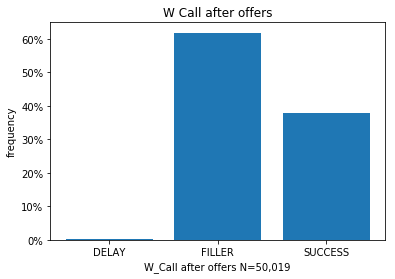

In [2]:
# build a frequency barchart for each category
N = df.shape[0]
M = df[df['Activity'] == 'W_Call after offers'].shape[0]
activitydf = df[df['Activity'] == 'W_Call after offers']
df1 = activitydf[activitydf['Status'] == 1]
df2 = activitydf[activitydf['Status'] == 2]
df3 = activitydf[activitydf['Status'] == 3]

success = float(df1.shape[0]) / M
filler  = float(df2.shape[0]) / M
delay   = float(df3.shape[0]) / M


D = {u'SUCCESS':success*100, u'DELAY': delay*100, u'FILLER':filler*100}

xlabel = "W_Call after offers N=%s"%("{:,}".format(M))

fig, ax = plt.subplots()
plt.title('W Call after offers')
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())
plt.xlabel(xlabel)
plt.ylabel("frequency")
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.yaxis.set_major_formatter(formatter)




plt.show()

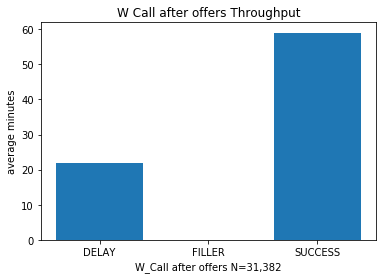

In [8]:
# build a time spent
success = pd.to_timedelta(df1['Delta']).sum() / df1['Delta'].shape[0]
filler  = pd.to_timedelta(df2['Delta']).sum() / df2['Delta'].shape[0]
delay   = pd.to_timedelta(df3['Delta']).sum() / df3['Delta'].shape[0]

hours, remainder = divmod(success.seconds, 3600)
successminutes, seconds = divmod(remainder, 60)

hours, remainder = divmod(filler.seconds, 3600)
fillerminutes, seconds = divmod(remainder, 60)

hours, remainder = divmod(delay.seconds, 3600)
delayminutes, seconds = divmod(remainder, 60)

if seconds > 45:
    delayminutes+=1

D = {u'SUCCESS':successminutes, u'DELAY': delayminutes, u'FILLER':fillerminutes}
plt.title('W Call after offers Throughput')
plt.xlabel(xlabel)
plt.ylabel("average minutes")

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())
plt.show()

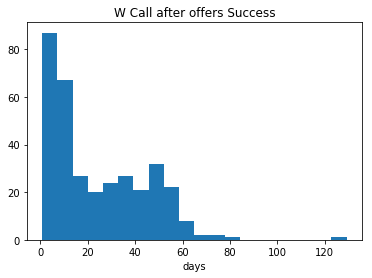

In [9]:
# Histogram of success per minute
success =  pd.to_timedelta(df1['Delta']) / np.timedelta64(1, 's')
# x = np.zeros(success.shape)
# for i,suc in success.itertools:
days, remainder = divmod(success, 3600*24)
hours, remainder = divmod(remainder, 3600)
minutes, seconds = divmod(remainder, 60)
x = days + hours/24 + minutes/(24*60) + seconds
#    x x[i] = days + hours/24 + minutes/(24*60) + seconds

# print divmod(success, 3600)

plt.title('W Call after offers Success')
plt.xlabel('days')
plt.hist(x, bins=20)
plt.show()


In [10]:
#Wrapped events
df4 = df[(~(df['Activity'] == 'W_Call after offers')) & (df["Status"]==1)] 
df4.loc[:,['Delta Trans','Delta Exec','Delta']] = df4.loc[:,['Delta Trans','Delta Exec','Delta']].apply(pd.to_timedelta)
print df4.head()


                     Case ID    Activity          Start Timestamp  \
2097  Application_1660185664  A_Complete  2016/01/04 05:13:05.965   
2324  Application_1999238509  A_Complete  2016/01/04 07:07:20.731   
2366   Application_927205634  A_Complete  2016/01/04 07:24:41.403   
6144  Application_2005183817  A_Complete  2016/01/06 05:18:58.247   
8345  Application_1926826475  A_Complete  2016/01/28 13:05:15.263   

           Complete Timestamp     Delta Trans Delta Exec           Delta  \
2097  2016/01/04 05:13:05.965 00:00:00.003000     0 days 00:00:00.003000   
2324  2016/01/04 07:07:20.731 00:00:00.002000     0 days 00:00:00.002000   
2366  2016/01/04 07:24:41.403 00:00:00.004000     0 days 00:00:00.004000   
6144  2016/01/06 05:18:58.247 00:00:00.004000     0 days 00:00:00.004000   
8345  2016/01/28 13:05:15.263 00:00:00.020000     0 days 00:00:00.020000   

      Status  
2097       1  
2324       1  
2366       1  
6144       1  
8345       1  


/Users/Varela/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Index([u'A_Cancelled', u'A_Denied', u'O_Cancelled', u'O_Create Offer',
       u'O_Created', u'O_Returned', u'O_Sent (mail and online)',
       u'W_Assess potential fraud', u'W_Call incomplete files',
       u'W_Validate application'],
      dtype='object', name=u'Activity')
[ 32.90425     55.28066184  51.3735843   24.17244192   1.19845455  40.759
  18.5196      33.19041667  61.88811111  35.6615    ]


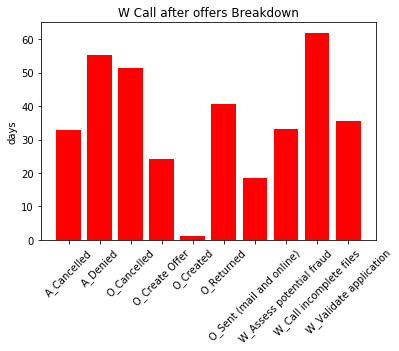

In [20]:
sumdeltasdf = pd.pivot_table(df4, values=['Delta'],columns=['Activity'], aggfunc=np.sum)
numdf       = pd.pivot_table(df4, values=['Delta'],columns=['Activity'], aggfunc=len)
columns     = sumdeltasdf.columns
l = len(columns.tolist())

x =  (sumdeltasdf.values / np.timedelta64(1, 's'))/ numdf.values
days, remainder = divmod(x, 3600*24)
hours, remainder = divmod(remainder, 3600)
minutes, seconds = divmod(remainder, 60)
x = days + hours/24 + minutes/(24*60) + seconds
x = x.reshape((l,))

#Prevent zeros from polluting
threshold =1
ind = x > threshold
xthresh = x[ind] 
columnsthresh = columns[np.where(ind)]

plt.title('W Call after offers Breakdown')


plt.bar(range(len(columnsthresh)), xthresh.T, align='center', color='red')
plt.xticks(range(len(columnsthresh)), columnsthresh,rotation=45)
plt.ylabel('days')
plt.show()
